In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,auc
import numpy as np

In [2]:
data=pd.read_csv("D:/从c盘转移的桌面/github/Python Financial Engineering/Financial Engineering Project6/Bcard.txt")

In [3]:
feature_lst=['person_info','finance_info','credit_info','act_info']
data

,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,2018-07-31,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,2018-09-30,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,2018-07-31,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,2018-07-31,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95801,2018-11-30,0.0,Ab99_96436391998107976,0.890233,0.442687,0.802687,0.776982,0.638971,0.605522,0.078853,0.142857,0.25,0.076923
95802,2018-11-30,0.0,Ab99_96436391998176292,0.161840,0.495766,0.085750,0.536738,0.596144,0.132972,0.078853,0.023810,0.00,0.076923
95803,2018-11-30,0.0,Ab99_96436391998322771,0.746522,0.732739,0.025475,0.831805,0.642904,0.029297,0.078853,0.023810,0.00,0.076923
95804,2018-11-30,0.0,Ab99_96436391998973383,0.176846,0.749610,0.933879,0.506921,0.867099,0.751643,0.078853,0.023810,0.02,0.076923


In [4]:
train=data[data.obs_mth != '2018-11-30'].reset_index().copy()
train

,index,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,1,2018-07-31,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,2,2018-09-30,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,3,2018-07-31,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,4,2018-07-31,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79826,79826,2018-09-30,0.0,Ab99_96436392005147255,0.905578,0.927706,0.994447,0.315842,0.959443,0.042640,0.078853,0.071429,0.13,0.076923
79827,79827,2018-10-31,0.0,Ab99_96436392005205003,0.639265,0.219267,0.845014,0.751332,0.275557,0.902642,0.078853,0.023810,0.00,0.076923
79828,79828,2018-10-31,0.0,Ab99_96436392005412387,0.355061,0.837747,0.931882,0.442463,0.579277,0.740754,0.078853,0.023810,0.02,0.076923
79829,79829,2018-10-31,0.0,Ab99_96436392006241624,0.797237,0.501238,0.490850,0.592068,0.479618,0.859870,0.078853,0.023810,0.00,0.076923


In [5]:
val=data[data.obs_mth == '2018-11-30'].reset_index().copy()
x=train[feature_lst]
y=train['bad_ind']

In [6]:
val_x=val[feature_lst]
val_y=val['bad_ind']

In [7]:
Ir_model=LogisticRegression(C=0.1)
Ir_model.fit(x,y)

LogisticRegression(C=0.1)

In [8]:
y_pred=Ir_model.predict_proba(x)[:,1]#ks of data
fpr_lr_train,tpr_lr_train,_=roc_curve(y,y_pred)
train_ks=abs(fpr_lr_train-tpr_lr_train).max()
print('Logistic_no_balanced，train_ks:',train_ks)

Logistic_no_balanced，train_ks: 0.41573985983413414


In [9]:
y_pred=Ir_model.predict_proba(val_x)[:,1]#ks of val
fpr_lr,tpr_lr,_=roc_curve(val_y,y_pred)
val_ks=abs(fpr_lr-tpr_lr).max()
print('Logistic_no_balanced，val_ks:',val_ks)

Logistic_no_balanced，val_ks: 0.3928959732014397


In [10]:
lr_model = LogisticRegression(C=0.1,class_weight = 'balanced')
lr_model.fit(x,y)
y_pred = lr_model.predict_proba(x)[:,1] 
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred) #TPR and FPR
train_ks = abs(fpr_lr_train - tpr_lr_train).max() 
print('Logistic_balanced_train_ks : ',train_ks)

Logistic_balanced_train_ks :  0.4482325608488951


In [11]:
y_pred = lr_model.predict_proba(val_x)[:,1] #calculate val
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)   
val_ks = abs(fpr_lr - tpr_lr).max()         
print('Logistic_balanced_val_ks : ',val_ks)

Logistic_balanced_val_ks :  0.4198642457760936


In [12]:
!pip install lightgbm
import lightgbm as lgb

  Using cached lightgbm-4.0.0-py3-none-win_amd64.whl (1.3 MB)


In [13]:

def lgb_test(train_x,train_y,test_x,test_y):   
    clf = lgb.LGBMClassifier(boosting_type='gbdt',
                             objective='binary',
                             metric='auc',
                             learning_rate=0.1,
                             n_estimators=24,
                             max_depth=4,
                             num_leaves=25,
                             max_bin=40,
                             min_data_in_leaf=5,
                             bagging_fraction=0.6,
                             bagging_freq=0,
                             feature_fraction=0.8,
                             )
    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (test_x, test_y)], eval_metric='auc')
    print(type(clf.best_score_))
    print(clf.best_score_)
    return clf, clf.best_score_['valid_1']['auc']

In [14]:

feature_lst = ['person_info','finance_info','credit_info','act_info']
train_x = train[feature_lst]
train_y = train['bad_ind']
test_x = val[feature_lst]
test_y = val['bad_ind']
lgb_model,lgb_auc  = lgb_test(train_x,train_y,test_x,test_y)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 1470, number of negative

In [15]:
sample=train_x.copy()
sample['bad_ind']=train_y
sample['pred']=lgb_model.predict_proba(train_x)[:,1]
sample=sample.sort_values(by=['pred'],ascending=False).reset_index()
sample['rank']=np.array(sample.index)/len(sample)
sample

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


,index,person_info,finance_info,credit_info,act_info,bad_ind,pred,rank
0,12039,0.062660,0.690476,0.85,0.076923,1.0,0.608498,0.000000
1,56269,0.078853,0.738095,0.35,0.525641,1.0,0.584865,0.000013
2,79624,0.078853,0.619048,0.86,0.076923,0.0,0.565661,0.000025
3,50459,0.078853,0.571429,0.17,0.153846,1.0,0.562057,0.000038
4,12355,0.078853,0.666667,0.25,0.397436,0.0,0.547170,0.000050
...,...,...,...,...,...,...,...,...
79826,31712,-0.322581,0.023810,0.00,0.551282,0.0,0.003445,0.999937
79827,31717,-0.322581,0.023810,0.00,0.551282,0.0,0.003445,0.999950
79828,31750,-0.322581,0.023810,0.00,0.576923,0.0,0.003445,0.999962
79829,31756,-0.322581,0.023810,0.00,0.538462,0.0,0.003445,0.999975


In [16]:
def weight(x,y):
    if x==0 and y<0.1:
        return 0.1
    elif x==1 and y>0.7:
        return 0.1
    else:
        return 1

In [17]:
sample['weight']=sample.apply(lambda x: weight(x.bad_ind,x['rank']),axis=1)
smote_sample=sample[sample.weight==1]#use smote to remove extreme data
drop_sample=sample[sample.weight<1]

In [18]:
train_x_smote=smote_sample[feature_lst]
train_y_smote=smote_sample['bad_ind']

In [25]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

     -------------------------------------- 235.6/235.6 kB 4.8 MB/s eta 0:00:00


In [26]:
def smote(train_x_smote,train_y_smote,K=15,random_state=0):
    #from imblearn.over_sampling import SMOTE
    smote=SMOTE(k_neighbors=K,n_jobs=1,random_state=random_state)
    rex,rey=smote.fit_resample(train_x_smote,train_y_smote)
    return rex,rey
    

In [27]:

rex,rey =smote(train_x_smote,train_y_smote)
print(rex)
print(rey)
print('badpctn:',rey.sum()/len(rey))

        person_info  finance_info  credit_info  act_info
0          0.062660      0.690476     0.850000  0.076923
1          0.078853      0.738095     0.350000  0.525641
2          0.078853      0.571429     0.170000  0.153846
3          0.078853      0.761905     0.180000  0.076923
4          0.078853      0.595238     0.200000  0.076923
...             ...           ...          ...       ...
142219     0.074018      0.342923     0.111945  0.076923
142220    -0.261014      0.266902     0.110535  0.076923
142221     0.078853      0.096232     0.049165  0.076923
142222     0.078853      0.023810     0.087191  0.076923
142223     0.054824      0.119048     0.000000  0.222066

[142224 rows x 4 columns]
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
142219    1.0
142220    1.0
142221    1.0
142222    1.0
142223    1.0
Name: bad_ind, Length: 142224, dtype: float64
badpctn: 0.5


c:\Users\HUAWEI\anaconda3\envs\risk_ctrl\lib\site-packages\imblearn\over_sampling\_smote\base.py:349: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  FutureWarning,


In [28]:
x_smote=rex[feature_lst]
y_smote=rey
Ir_model=LogisticRegression(C=0.1)
Ir_model.fit(x_smote,y_smote)
x=train[feature_lst]
y=train['bad_ind']
val_x=val[feature_lst]
val_y=val['bad_ind']
y_pred=Ir_model.predict_proba(x)[:,1]

In [29]:
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred)#Smote without balanced Logistic
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('Smote but without balanced Logistic train_ks : ',train_ks)

Smote but without balanced Logistic train_ks :  0.47157556249998367


In [30]:
y_pred = lr_model.predict_proba(val_x)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
val_ks = abs(fpr_lr - tpr_lr).max()
print('Smote but without balanced Logistic val_ks : ',val_ks)

Smote but without balanced Logistic val_ks :  0.4198642457760936


In [31]:
!pip install pyod
from pyod.models.lof import LOF
clf=LOF(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,
        metric_params=None,contamination=0.1,n_jobs=1)
clf.fit(x)
out_pred=clf.predict_proba(x,method='linear')[:,1]
train['out_pred']=out_pred

  Using cached pyod-1.1.0.tar.gz (153 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.5/2.5 MB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 9.5 MB/s eta 0:00:00
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185463 sha256=6fff5e77062f3417c357216e644db324d1af31276be95f26f17a216914c3e887
  Stored in directory: c:\users\huawei\appdata\local\pip\cache\wheels\af\c5\35\118dfec39c956e6c9d24d34c807c9251713ee034b2ed12019d
Successfully built pyod


In [32]:
key=train['out_pred'].quantile(0.93)
x=train[train.out_pred<key][feature_lst]#Filter out rows with scores less than 93; this is the result of LOF prediction
y=train[train.out_pred<key]['bad_ind']

In [33]:
val_x=val[feature_lst]
val_y=val['bad_ind']

In [34]:
Ir_model=LogisticRegression(C=0.1,class_weight='balanced')
lr_model.fit(x,y)
y_pred = lr_model.predict_proba(x)[:,1]
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred)
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('LOF with balance Logistic train_ks : ',train_ks)

LOF with balance Logistic train_ks :  0.44481797169355447


In [35]:
y_pred = lr_model.predict_proba(val_x)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
val_ks = abs(fpr_lr - tpr_lr).max()
print('LOF with balance Logistic val_ks : ',val_ks)

LOF with balance Logistic val_ks :  0.41948078568789776


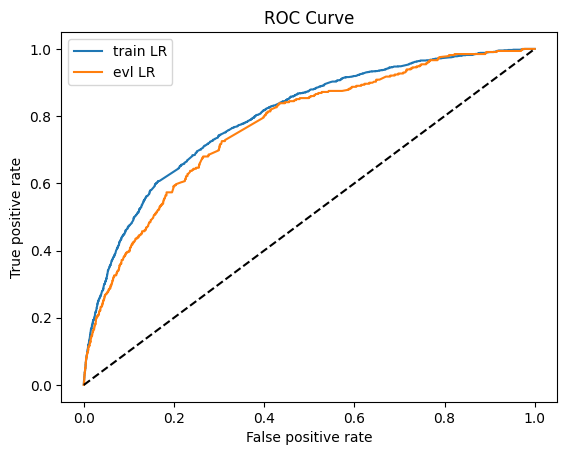

In [36]:
from matplotlib import pyplot as plt
plt.plot(fpr_lr_train,tpr_lr_train,label = 'train LR')
plt.plot(fpr_lr,tpr_lr,label = 'evl LR')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()